In [847]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np


df0 = pd.read_csv('housing.csv')
df = df0.copy()

In [848]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [849]:
df.describe()



,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [850]:
#df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [851]:
list_of_bool_cols = [i for i in df.columns if df[i].dtype == 'object']
list_of_bool_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

<Axes: xlabel='area', ylabel='price'>

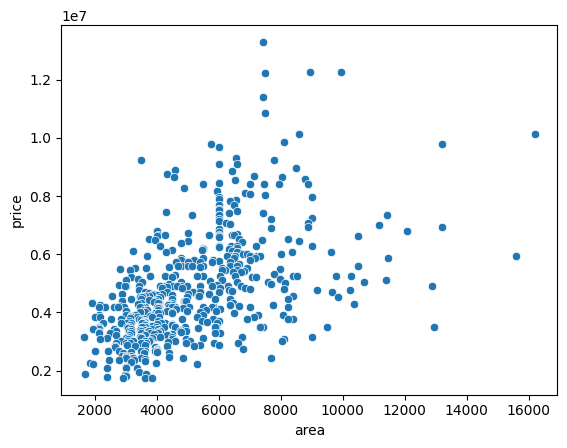

In [852]:
X = df.drop(['price'], axis = 1)
y = df.price


sns.scatterplot(df, x = 'area', y = 'price')

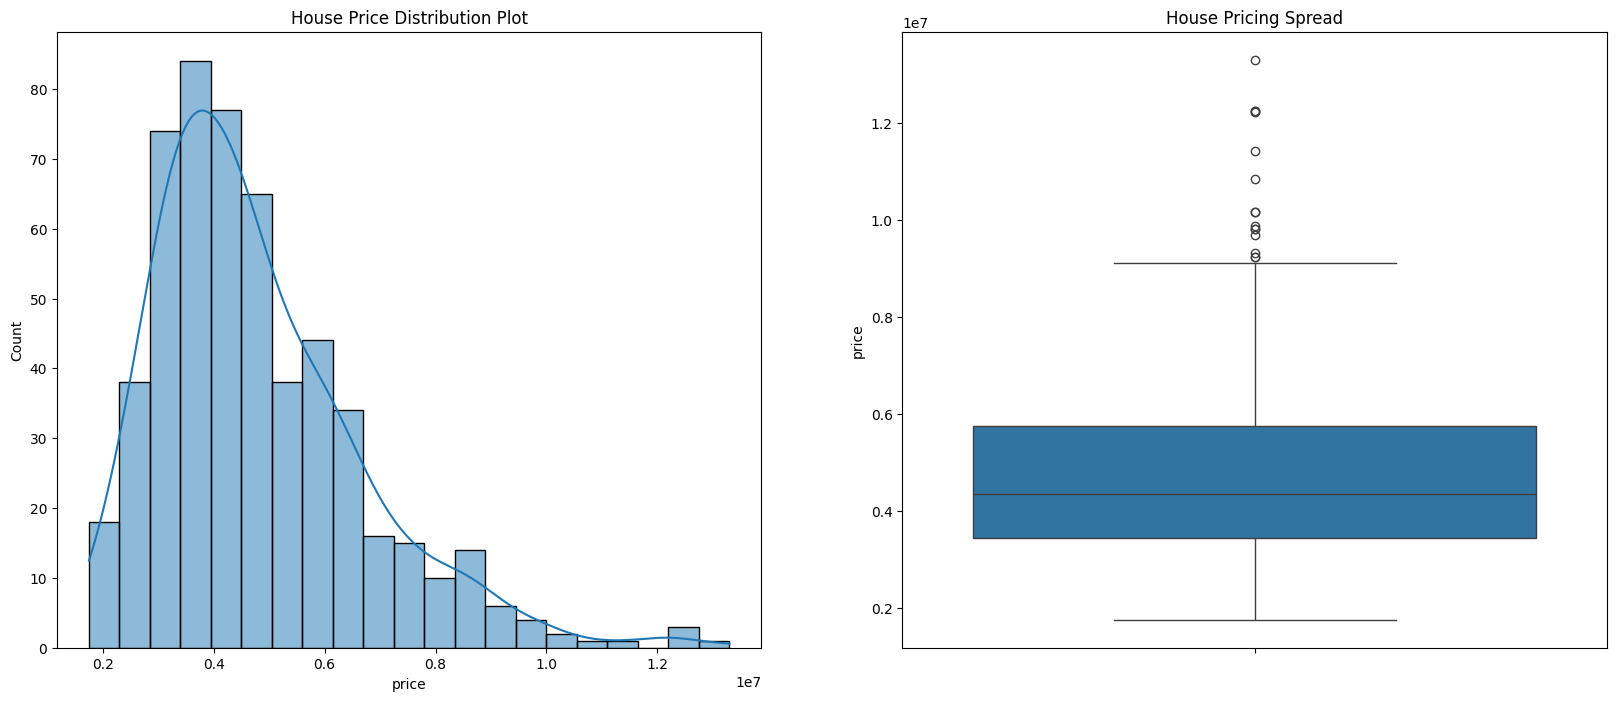

In [853]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.histplot(df.price, kde=True)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

In [854]:
reg = sklearn.linear_model.LinearRegression() 

reg.fit(X[['area']], y)

reg.score(X[['area']], y)

0.2872931546811468

In [855]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


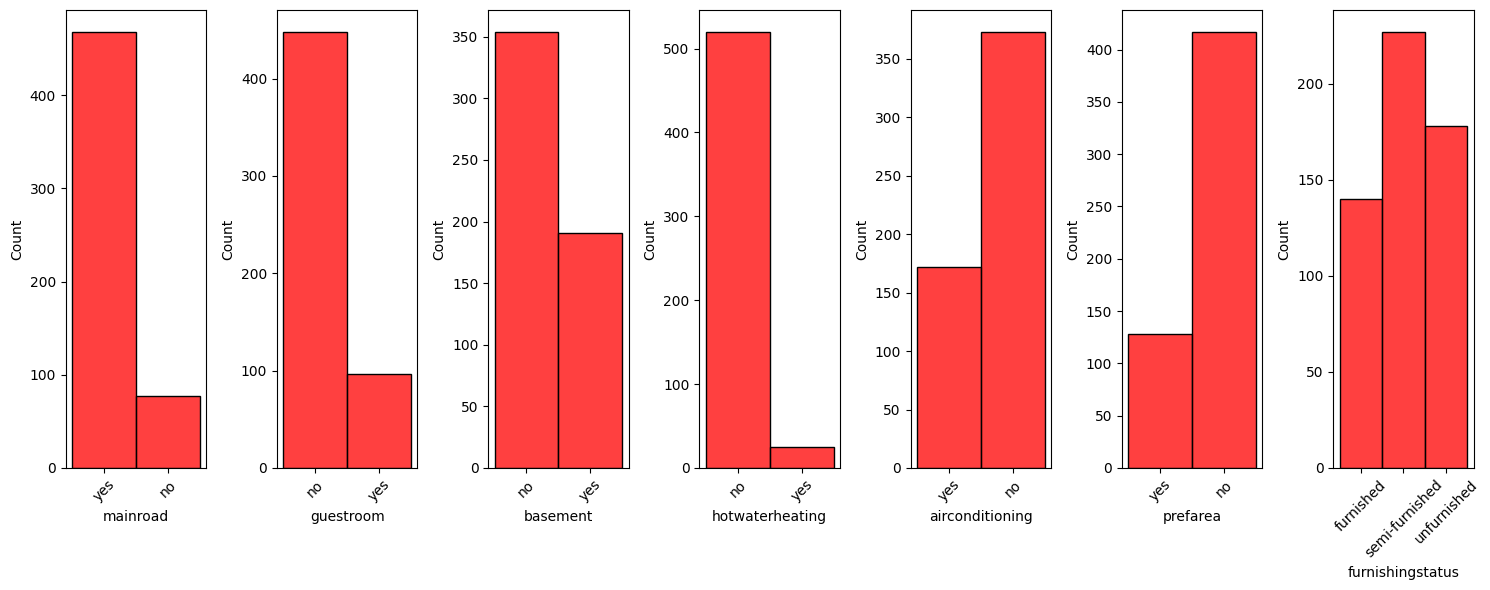

In [856]:
plt.figure(figsize=(15, 6))


for i in range(len(list_of_bool_cols)):
    name_of_col = list_of_bool_cols[i]
    plt.subplot(1,len(list_of_bool_cols),i+1)
    sns.histplot(df[name_of_col], color='red')
    plt.xticks(rotation=45)
    plt.tight_layout()


<Axes: title={'center': 'House Pricing Spread'}, ylabel='area'>

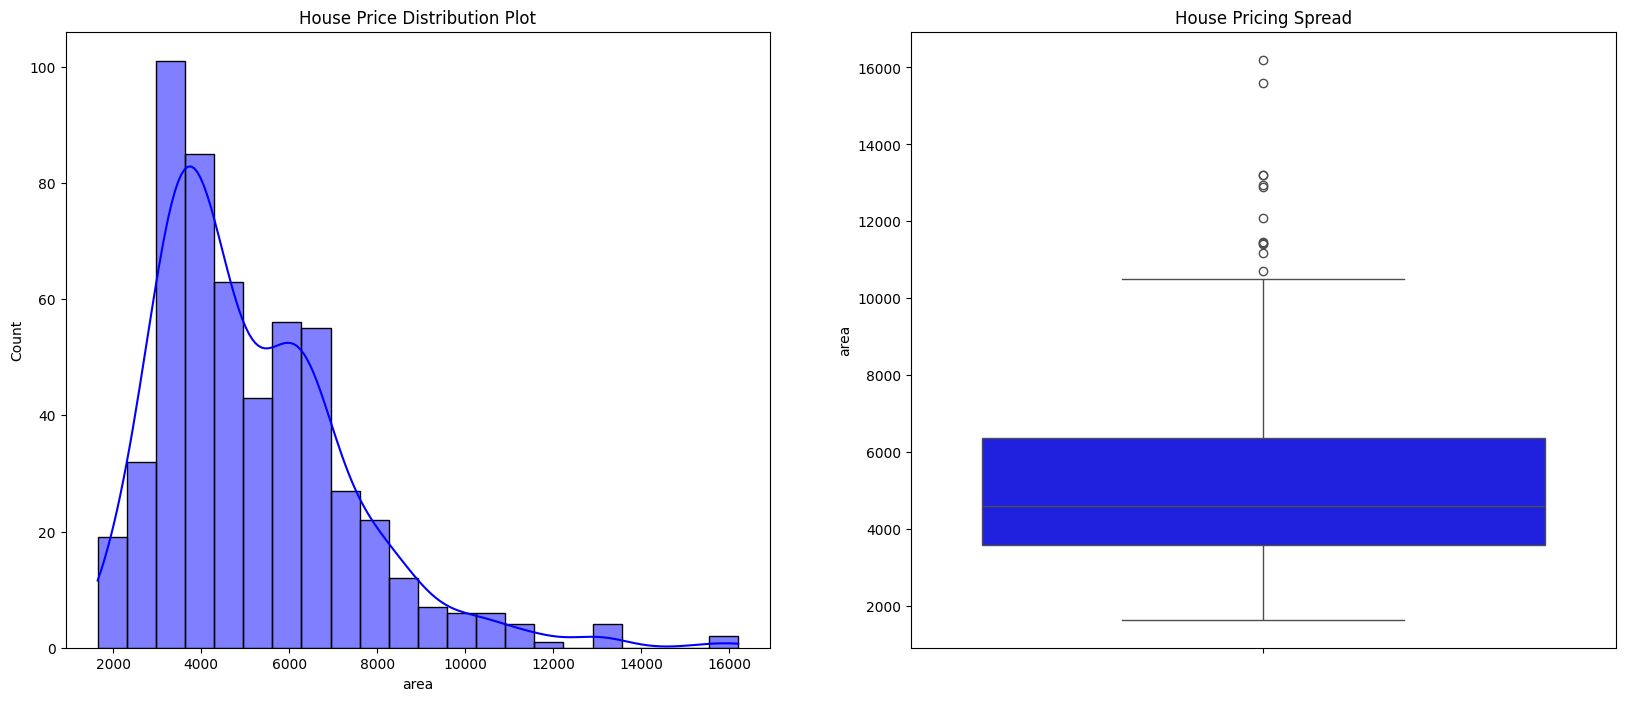

In [857]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.histplot(df.area, kde=True, color = 'blue')

plt.subplot(1,2,2)
plt.title('House Pricing Spread')
sns.boxplot(df.area,color = 'blue')


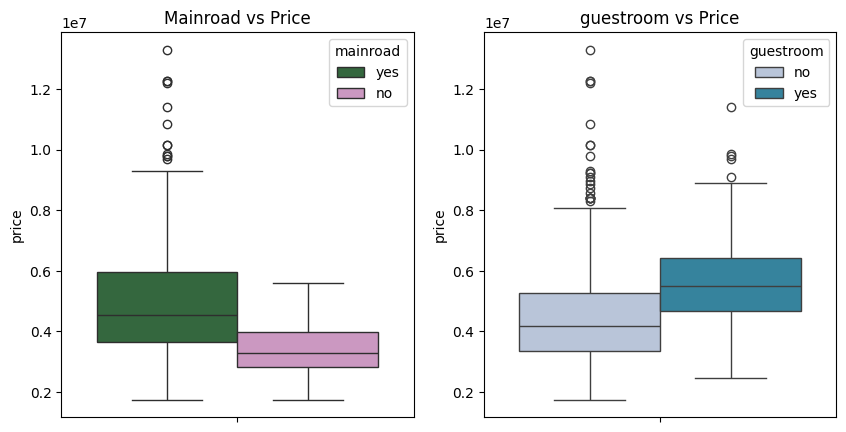

In [858]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(df0,  y='price', palette="cubehelix", hue="mainroad", legend=True)

plt.subplot(1,2,2)
plt.title('guestroom vs Price')
sns.boxplot(df0,  y='price', palette="PuBuGn", hue="guestroom", legend=True)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18840\3968962739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df0, x='basement', y='price', palette=("cubehelix"))
C:\Users\user\AppData\Local\Temp\ipykernel_18840\3968962739.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df0, x='hotwaterheating', y='price', palette=("PuBuGn"))


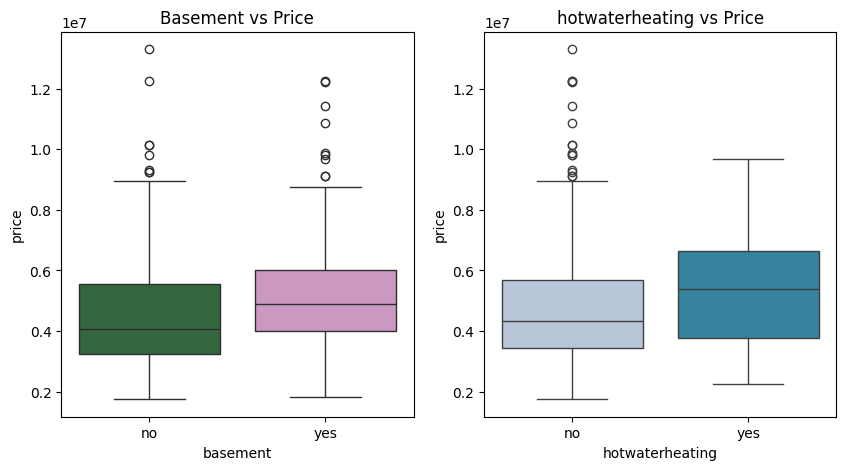

In [859]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Basement vs Price')
sns.boxplot(df0, x='basement', y='price', palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('hotwaterheating vs Price')
sns.boxplot(df0, x='hotwaterheating', y='price', palette=("PuBuGn"))

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18840\1910191449.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df0, x='prefarea', y='price', palette=("husl"))


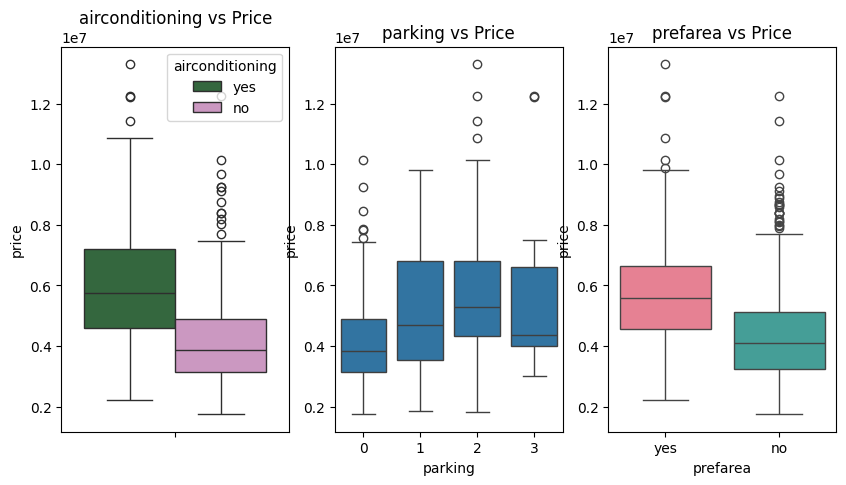

In [860]:
plt.figure(figsize=(10,5))


			#furnishingstatus

plt.subplot(1,3,1)
plt.title('airconditioning vs Price')
sns.boxplot(df0,  y='price', palette="cubehelix", hue="airconditioning", legend=True)

plt.subplot(1,3,2)
plt.title('parking vs Price')
sns.boxplot(df0, x='parking', y='price')

plt.subplot(1,3,3)
plt.title('prefarea vs Price')
sns.boxplot(df0, x='prefarea', y='price', palette=("husl"))

plt.show()

In [861]:
numerical_list = [i for i in df0.columns if df0[i].dtype == "int64" or df0[i].dtype == "float64"]
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


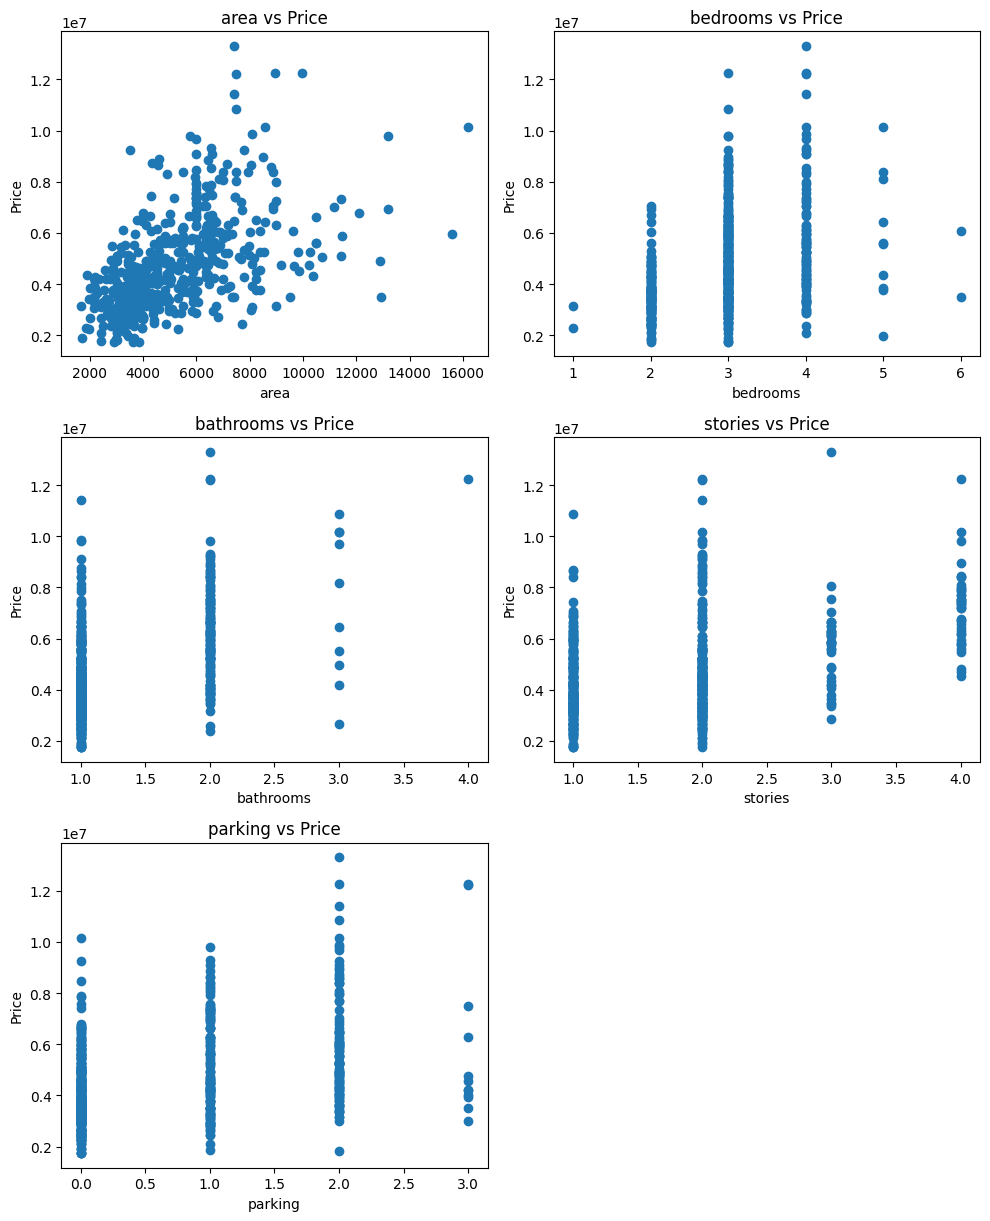

In [862]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

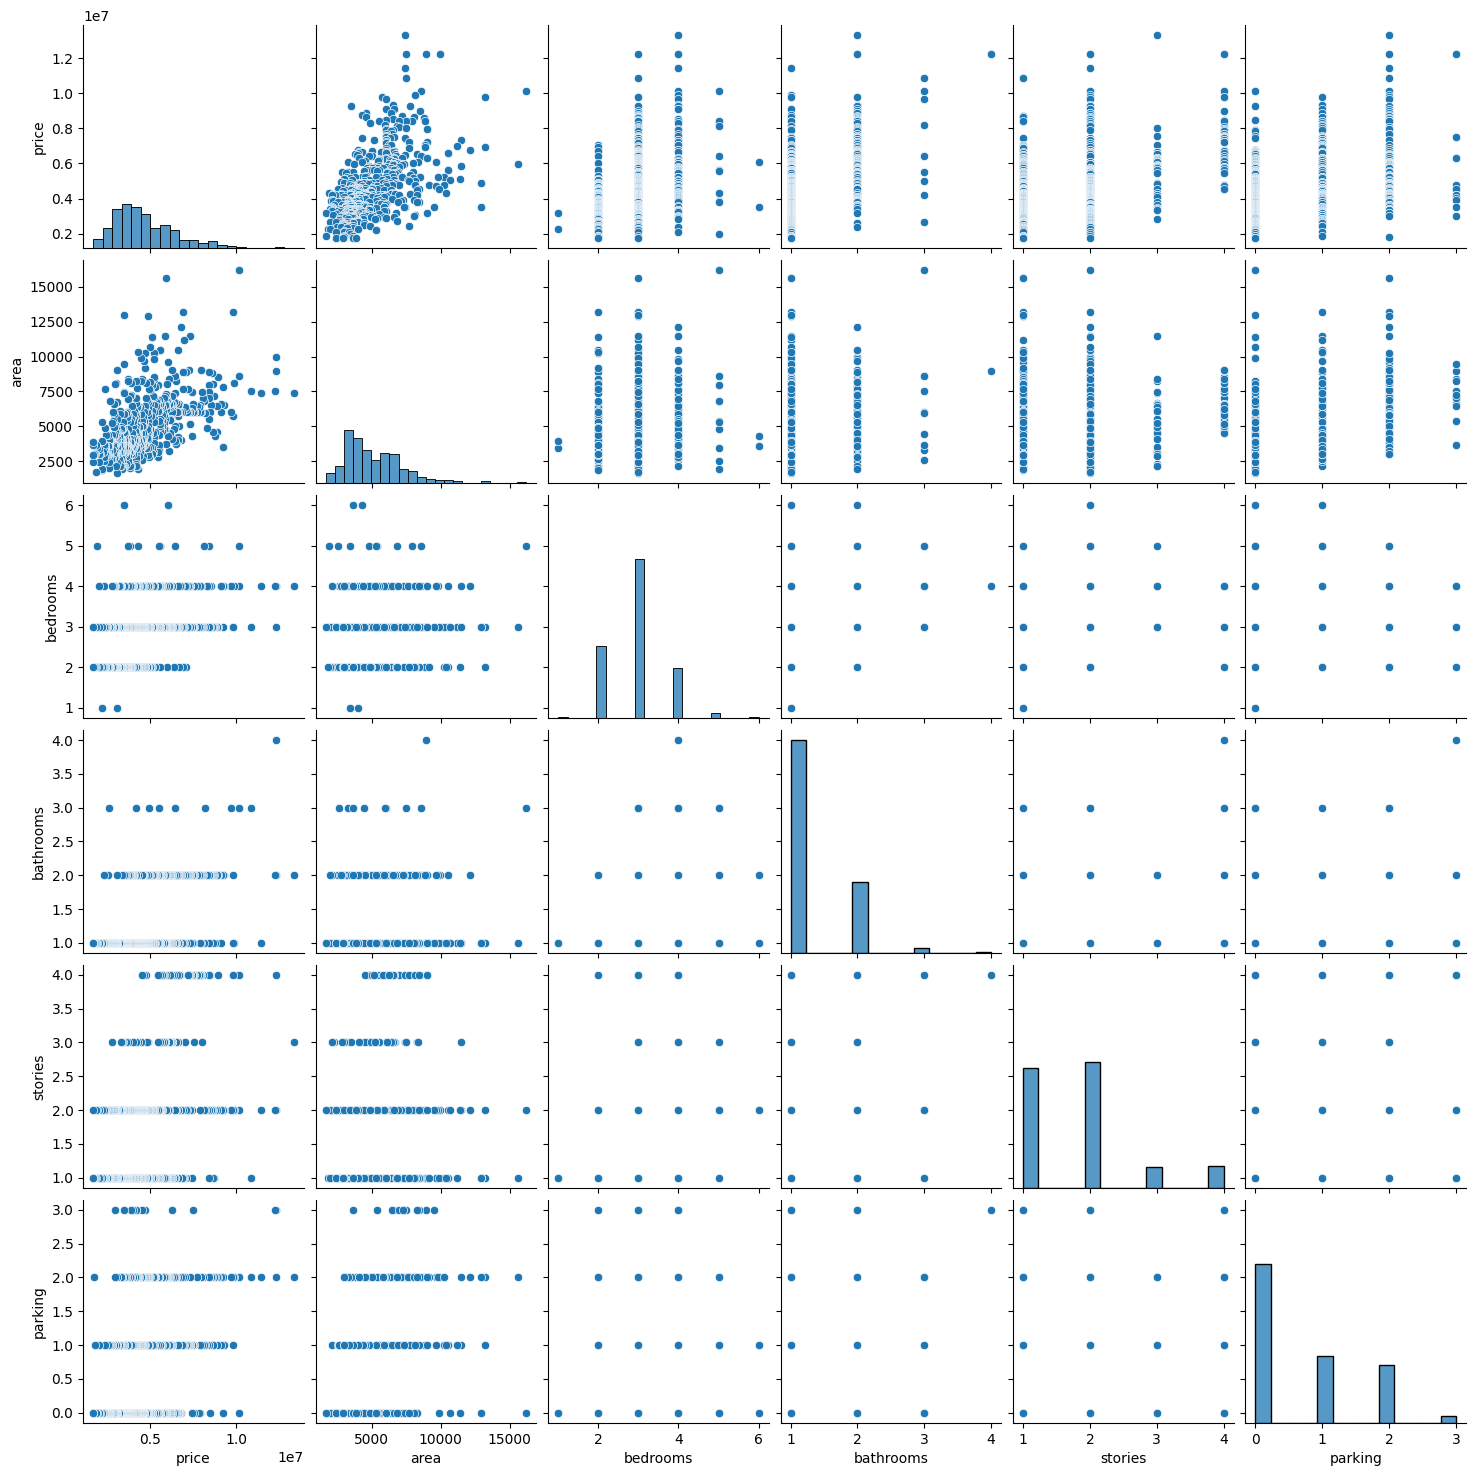

In [863]:
sns.pairplot(df0)
plt.show()

In [864]:
cor_matrix= df[numerical_list].corr()
cor_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


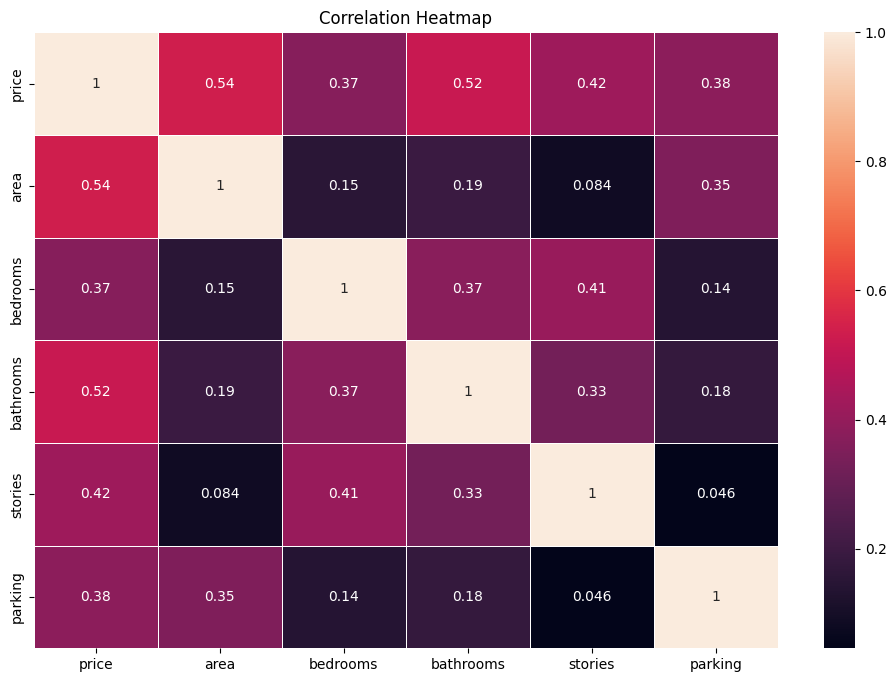

In [865]:
plt.figure(figsize=(12,8))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [866]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [867]:
# Defining the map function
def dummies(x,df):
    df = df.copy()
    temp = pd.get_dummies(df[x], drop_first = True).astype(int)
    df = pd.concat((df, temp), axis = 1)
    df.drop([x], axis = 1, inplace = True)
    df = df.rename(columns={"yes":x})

    return df

# Applying the function to the df

df = dummies('mainroad',df)
df = dummies('guestroom',df)
df = dummies('hotwaterheating',df)
df = dummies('basement',df)
df = dummies('airconditioning',df)
df = dummies('prefarea',df)
df = dummies('furnishingstatus',df)


In [868]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,hotwaterheating,basement,airconditioning,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,0,1,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [869]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [870]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[numerical_list] = scaler.fit_transform(df_train[numerical_list])

In [871]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [872]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [873]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [874]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', np.True_, np.int64(1)),
 ('bedrooms', np.True_, np.int64(1)),
 ('bathrooms', np.True_, np.int64(1)),
 ('stories', np.True_, np.int64(1)),
 ('parking', np.True_, np.int64(1)),
 ('mainroad', np.True_, np.int64(1)),
 ('guestroom', np.True_, np.int64(1)),
 ('hotwaterheating', np.True_, np.int64(1)),
 ('basement', np.False_, np.int64(3)),
 ('airconditioning', np.True_, np.int64(1)),
 ('prefarea', np.True_, np.int64(1)),
 ('semi-furnished', np.False_, np.int64(4)),
 ('unfurnished', np.False_, np.int64(2))]

In [875]:
X_train.columns[rfe.support_]


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad',
       'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea'],
      dtype='object')

In [876]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,hotwaterheating,airconditioning,prefarea
22,0.432609,0.4,0.000000,0.000000,0.333333,1,1,0,1,0
41,0.314954,0.4,0.333333,1.000000,0.000000,1,0,0,1,1
91,0.342105,0.2,0.000000,0.000000,0.666667,1,1,0,0,1
118,0.319131,0.4,0.000000,0.000000,0.000000,1,0,0,1,1
472,0.124896,0.6,0.000000,0.333333,1.000000,1,0,0,0,0


In [877]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant for intercept
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    print(X.values)
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [878]:
X_train_new = build_model(X_train_rfe,y_train)
X_train_new

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     84.45
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.80e-94
Time:                        12:27:33   Log-Likelihood:                 414.89
No. Observations:                 436   AIC:                            -807.8
Df Residuals:                     425   BIC:                            -762.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0042      0.018     

,const,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,hotwaterheating,airconditioning,prefarea
22,1.0,0.432609,0.4,0.000000,0.000000,0.333333,1,1,0,1,0
41,1.0,0.314954,0.4,0.333333,1.000000,0.000000,1,0,0,1,1
91,1.0,0.342105,0.2,0.000000,0.000000,0.666667,1,1,0,0,1
118,1.0,0.319131,0.4,0.000000,0.000000,0.000000,1,0,0,1,1
472,1.0,0.124896,0.6,0.000000,0.333333,1.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.093567,0.2,0.000000,0.000000,0.000000,1,0,0,0,0
53,1.0,0.230716,0.4,0.333333,1.000000,0.666667,1,0,0,1,0
350,1.0,0.110276,0.2,0.000000,0.333333,0.333333,1,0,1,0,0
79,1.0,0.289891,0.4,0.333333,0.666667,0.000000,1,1,0,1,0


In [879]:
X_train_new = X_train_new.drop(["bedrooms"], axis = 1)

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     93.23
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           6.18e-95
Time:                        12:27:33   Log-Likelihood:                 413.62
No. Observations:                 436   AIC:                            -807.2
Df Residuals:                     426   BIC:                            -766.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0228      0.013     

In [880]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

[[1.         0.4326093  0.         ... 0.         1.         0.        ]
 [1.         0.31495405 0.33333333 ... 0.         1.         1.        ]
 [1.         0.34210526 0.         ... 0.         0.         1.        ]
 ...
 [1.         0.11027569 0.         ... 1.         0.         0.        ]
 [1.         0.2898914  0.33333333 ... 0.         1.         0.        ]
 [1.         0.40824283 0.         ... 0.         0.         0.        ]]


,Features,VIF
0,const,8.44
1,area,1.31
2,bathrooms,1.22
3,stories,1.20
4,parking,1.18
8,airconditioning,1.18
5,mainroad,1.16
9,prefarea,1.09
6,guestroom,1.06
7,hotwaterheating,1.05


In [881]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     93.23
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           6.18e-95
Time:                        12:27:33   Log-Likelihood:                 413.62
No. Observations:                 436   AIC:                            -807.2
Df Residuals:                     426   BIC:                            -766.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0228      0.013     

In [882]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

[[1.         0.4326093  0.         ... 0.         1.         0.        ]
 [1.         0.31495405 0.33333333 ... 0.         1.         1.        ]
 [1.         0.34210526 0.         ... 0.         0.         1.        ]
 ...
 [1.         0.11027569 0.         ... 1.         0.         0.        ]
 [1.         0.2898914  0.33333333 ... 0.         1.         0.        ]
 [1.         0.40824283 0.         ... 0.         0.         0.        ]]


,Features,VIF
0,const,8.44
1,area,1.31
2,bathrooms,1.22
3,stories,1.20
4,parking,1.18
8,airconditioning,1.18
5,mainroad,1.16
9,prefarea,1.09
6,guestroom,1.06
7,hotwaterheating,1.05


In [883]:
lm = sm.OLS(y_train,X_train_new).fit()

y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

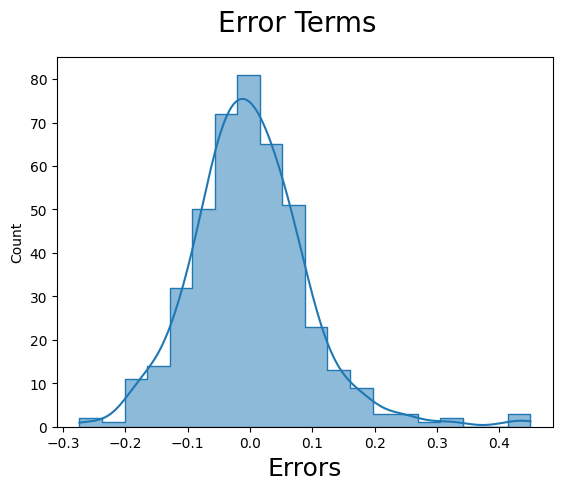

In [884]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20, kde =True, element="step",)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

In [885]:
# the test set numerical values scaled
df_test[numerical_list] = scaler.fit_transform(df_test[numerical_list])

In [886]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test
X_train_new

,const,area,bathrooms,stories,parking,mainroad,guestroom,hotwaterheating,airconditioning,prefarea
22,1.0,0.432609,0.000000,0.000000,0.333333,1,1,0,1,0
41,1.0,0.314954,0.333333,1.000000,0.000000,1,0,0,1,1
91,1.0,0.342105,0.000000,0.000000,0.666667,1,1,0,0,1
118,1.0,0.319131,0.000000,0.000000,0.000000,1,0,0,1,1
472,1.0,0.124896,0.000000,0.333333,1.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.093567,0.000000,0.000000,0.000000,1,0,0,0,0
53,1.0,0.230716,0.333333,1.000000,0.666667,1,0,0,1,0
350,1.0,0.110276,0.000000,0.333333,0.333333,1,0,1,0,0
79,1.0,0.289891,0.333333,0.666667,0.000000,1,1,0,1,0


In [887]:
X_train_new

,const,area,bathrooms,stories,parking,mainroad,guestroom,hotwaterheating,airconditioning,prefarea
22,1.0,0.432609,0.000000,0.000000,0.333333,1,1,0,1,0
41,1.0,0.314954,0.333333,1.000000,0.000000,1,0,0,1,1
91,1.0,0.342105,0.000000,0.000000,0.666667,1,1,0,0,1
118,1.0,0.319131,0.000000,0.000000,0.000000,1,0,0,1,1
472,1.0,0.124896,0.000000,0.333333,1.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.093567,0.000000,0.000000,0.000000,1,0,0,0,0
53,1.0,0.230716,0.333333,1.000000,0.666667,1,0,0,1,0
350,1.0,0.110276,0.000000,0.333333,0.333333,1,0,1,0,0
79,1.0,0.289891,0.333333,0.666667,0.000000,1,1,0,1,0


In [888]:

must_have_cols = X_test.columns[rfe.support_]
must_have_cols

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad',
       'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea'],
      dtype='object')

In [889]:
X_train_new = X_train_new.drop('const', axis = 1 )

X_test_new = X_test[must_have_cols]

#X_test_new = sm.add_constant(X_test_new)
X_test_new


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,hotwaterheating,airconditioning,prefarea
265,0.088172,0.333333,0.0,0.333333,0.000000,1,0,0,0,1
54,0.311828,0.333333,0.5,0.333333,0.333333,1,1,0,1,0
171,0.617849,0.333333,0.0,0.000000,0.333333,1,0,0,0,1
244,0.263082,0.333333,0.0,0.333333,0.000000,1,1,0,0,1
268,0.236559,0.666667,0.0,0.333333,0.000000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
451,0.365591,0.000000,0.0,0.000000,0.000000,1,0,0,0,0
320,0.191398,0.333333,0.0,0.333333,0.666667,1,0,0,0,1
424,0.103943,0.333333,0.0,0.333333,0.000000,0,0,0,0,0
338,0.152688,0.000000,0.0,0.333333,0.000000,1,1,0,0,0


In [890]:
X_test_new

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,hotwaterheating,airconditioning,prefarea
265,0.088172,0.333333,0.0,0.333333,0.000000,1,0,0,0,1
54,0.311828,0.333333,0.5,0.333333,0.333333,1,1,0,1,0
171,0.617849,0.333333,0.0,0.000000,0.333333,1,0,0,0,1
244,0.263082,0.333333,0.0,0.333333,0.000000,1,1,0,0,1
268,0.236559,0.666667,0.0,0.333333,0.000000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
451,0.365591,0.000000,0.0,0.000000,0.000000,1,0,0,0,0
320,0.191398,0.333333,0.0,0.333333,0.666667,1,0,0,0,1
424,0.103943,0.333333,0.0,0.333333,0.000000,0,0,0,0,0
338,0.152688,0.000000,0.0,0.333333,0.000000,1,1,0,0,0


In [891]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [892]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.46551237524855227

Text(0, 0.5, 'y_pred')

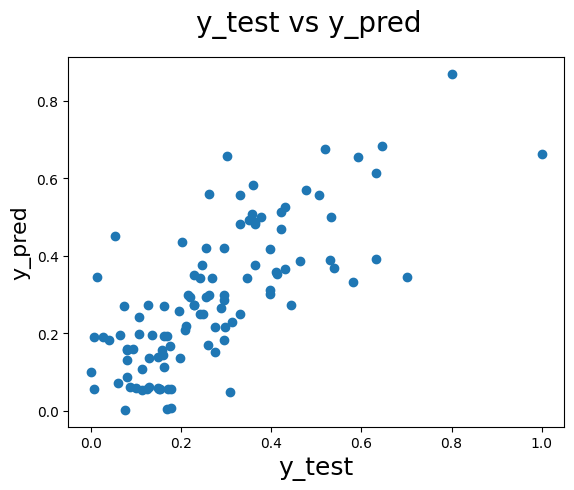

In [893]:
#EVALUATION OF THE MODEL
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [894]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     93.23
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           6.18e-95
Time:                        12:28:10   Log-Likelihood:                 413.62
No. Observations:                 436   AIC:                            -807.2
Df Residuals:                     426   BIC:                            -766.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0228      0.013     